In [357]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-loan-predictions/Test_Loan_Home.csv
/kaggle/input/home-loan-predictions/Train_Loan_Home.csv


# Importing Necessary Libraries

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [359]:
df=pd.read_csv('/kaggle/input/home-loan-predictions/Train_Loan_Home.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [360]:
df_test=pd.read_csv('/kaggle/input/home-loan-predictions/Test_Loan_Home.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Understanding the Data

In [361]:
df.shape,df_test.shape

((614, 13), (367, 12))

The training dataset has 614 rows and 13 columns and the test dataset has 367 rows and 12 columns

**Information about the training dataset**

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [363]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   367 non-null    object 
 1   Gender                    356 non-null    object 
 2   Married                   367 non-null    object 
 3   Dependents                357 non-null    object 
 4   Education                 367 non-null    object 
 5   Self_Employed             344 non-null    object 
 6   ApplicantIncomeMonthly    367 non-null    int64  
 7   CoapplicantIncomeMonthly  367 non-null    int64  
 8   LoanAmountThousands       362 non-null    float64
 9   Loan_Amount_Term_Months   361 non-null    float64
 10  Credit_History            338 non-null    float64
 11  Property_Area             367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Checking the Data types of each features**

In [364]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [365]:
df_test.dtypes

Loan_ID                      object
Gender                       object
Married                      object
Dependents                   object
Education                    object
Self_Employed                object
ApplicantIncomeMonthly        int64
CoapplicantIncomeMonthly      int64
LoanAmountThousands         float64
Loan_Amount_Term_Months     float64
Credit_History              float64
Property_Area                object
dtype: object

**Checking for null values**

In [366]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [367]:
df_test.isnull().sum()

Loan_ID                      0
Gender                      11
Married                      0
Dependents                  10
Education                    0
Self_Employed               23
ApplicantIncomeMonthly       0
CoapplicantIncomeMonthly     0
LoanAmountThousands          5
Loan_Amount_Term_Months      6
Credit_History              29
Property_Area                0
dtype: int64

**Heatmap to identify the features having null values**

<AxesSubplot:>

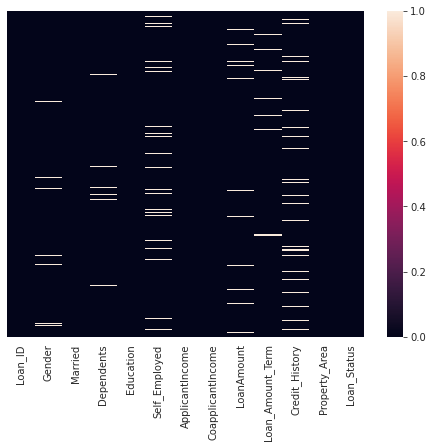

In [368]:
sns.heatmap(df.isnull(),yticklabels=False)

# Exploratory Data Analysis

In [369]:
#dropping the unnecessary column
df.drop('Loan_ID',axis=1,inplace=True)
df_test_id=df_test['Loan_ID']
df_test.drop('Loan_ID',axis=1,inplace=True)

In [370]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [371]:
#separating all the categorical features and numerical features
categorical_features=[]
numerical_features=[]
for i in X.columns.tolist():
    if X[i].dtype=='object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [372]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [373]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Univariate Analysis

In [374]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 0, 'Loan Status')

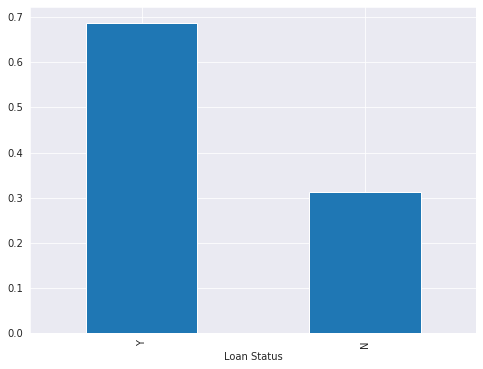

In [375]:
df['Loan_Status'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Loan Status')

**Among 614 customers The Loan was approved for 422 Customers (~70%)**

Feature:  Gender
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


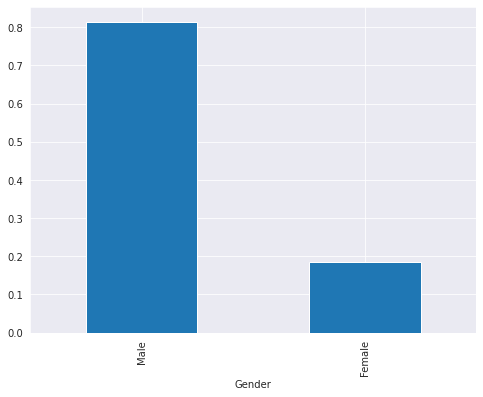



Feature:  Married
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


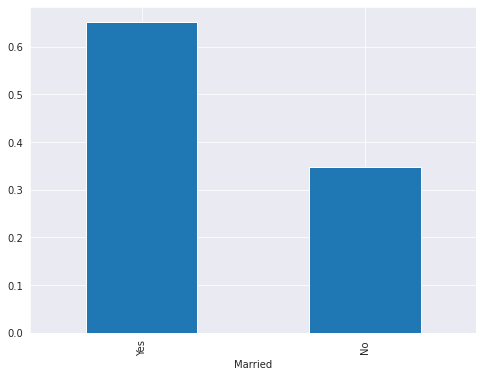



Feature:  Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


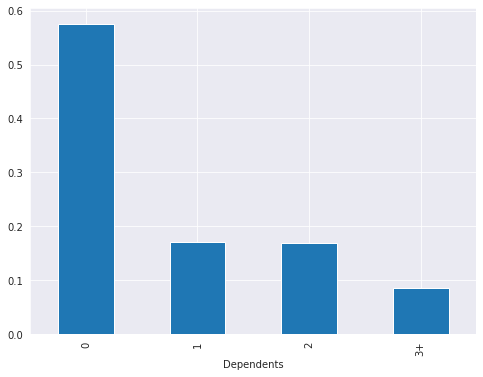



Feature:  Education
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


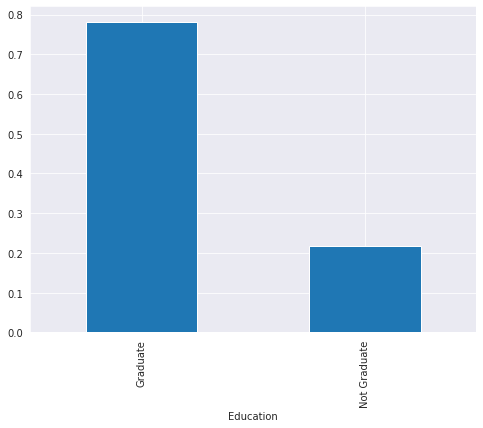



Feature:  Self_Employed
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


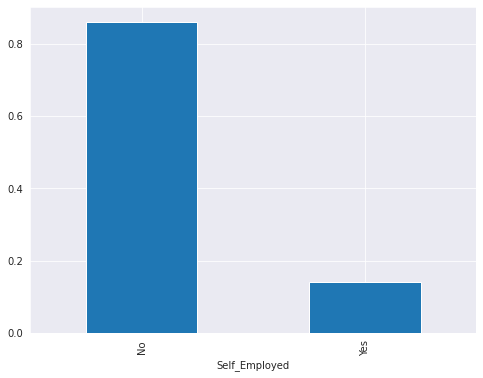



Feature:  Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


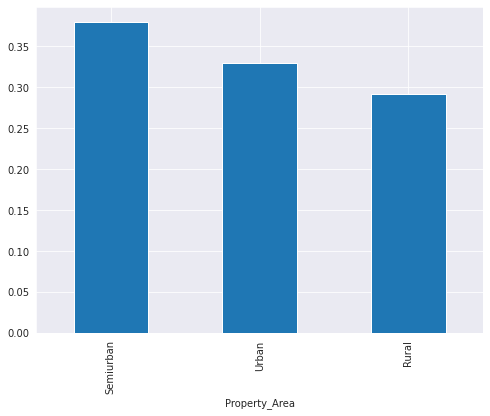

In [376]:
for i in categorical_features:
    print('Feature: ',i)
    print(X[i].value_counts(normalize=True))
    X[i].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel(i)
    plt.show()
    print('\n')

From The above visualizations it can be inferred that:
1. Around 81% customers are Male.
2. 65% customers are Married.
3. Most of the customers don't have any dependents.
4. 78% customers are Graduate.
5. Only 14% customers are self employed.
6. 38% customers are from semiurban area, 33% are from urban area, 29% are from rural area

**Numerical Features**

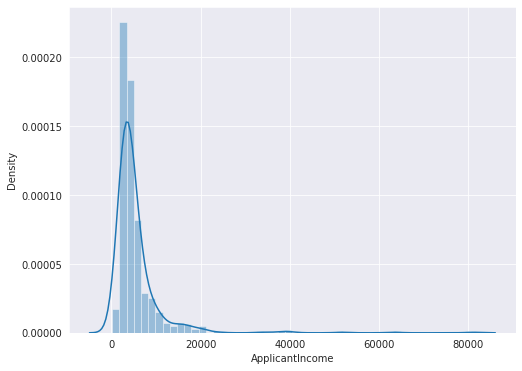

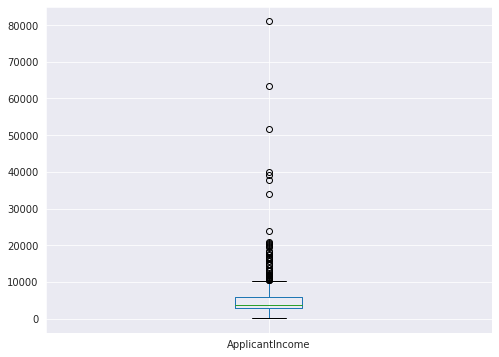

In [377]:
sns.distplot(X['ApplicantIncome'],bins=50,kde=True)
plt.show()
X['ApplicantIncome'].plot(kind='box')
plt.show()

From the above visualization it can be inferred that:
1. The Applicant Income Feature does not follow normal distribution, Most of the Income ranges from 0-20,000
2. The boxplot surely indicates that the feature is having many Outliers. It is due to different income labels of different customers.
  We can group the income of the customers with their education label

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

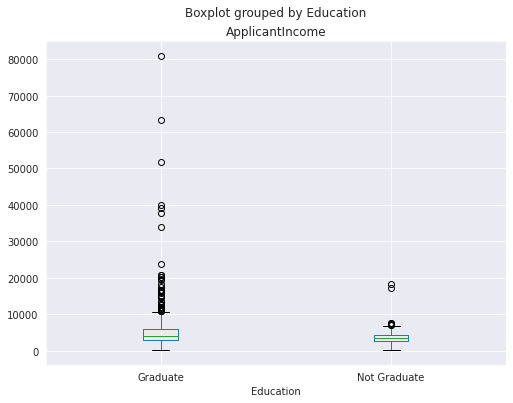

In [378]:
X.boxplot(column='ApplicantIncome',by='Education')

Most of the Customers who are graduate is having very high incomes

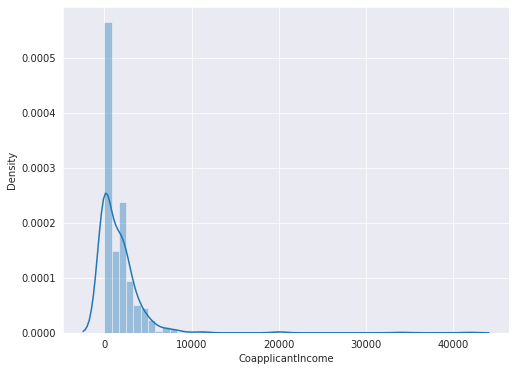

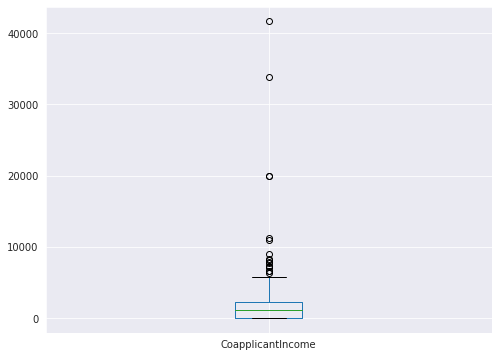

In [379]:
sns.distplot(X['CoapplicantIncome'],kde=True)
plt.show()
X.boxplot(column='CoapplicantIncome')
plt.show()

1. This feature is having a Right Skewed Distribution and most of the CoapplicantIncome ranges from 0-6000
2. Also the feature is having few outliers

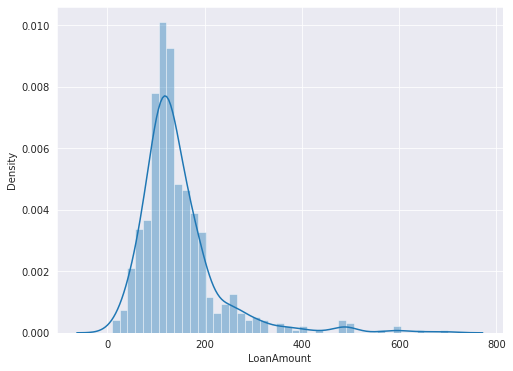

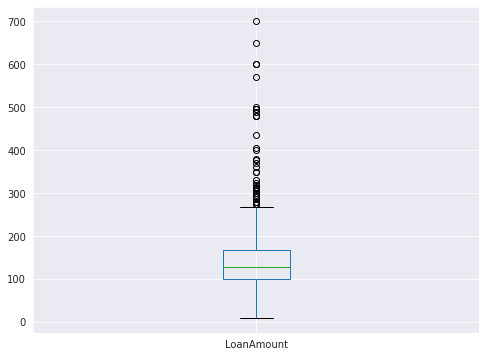

In [380]:
sns.distplot(X['LoanAmount'],kde=True)
plt.show()
X['LoanAmount'].plot(kind='box')
plt.show()

LoanAmount feature follows Normal Distribution but it is having many Outliers

**The features Loan_Amount_Term and Credit_History are having categorical values, so we will consider them in the categorical features list**

Text(0.5, 0, 'Loan Amount Term')

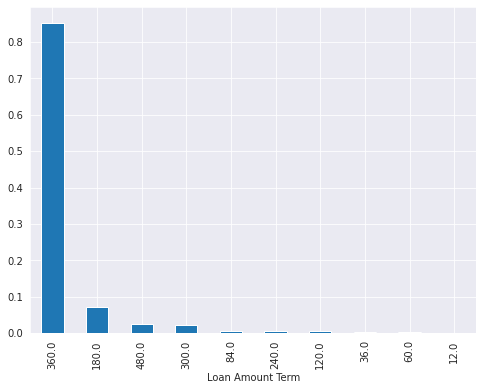

In [381]:
X['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Loan Amount Term')

Around 85% loans are having 360 as their loan amount term

# Bivariate Analysis

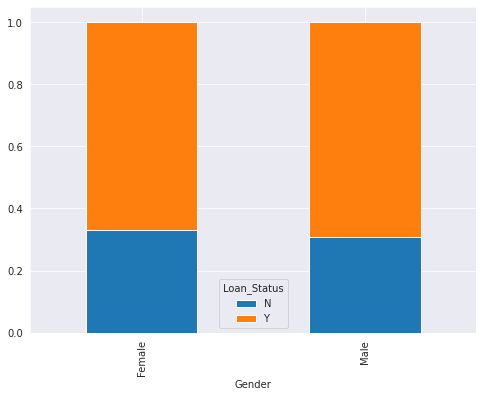

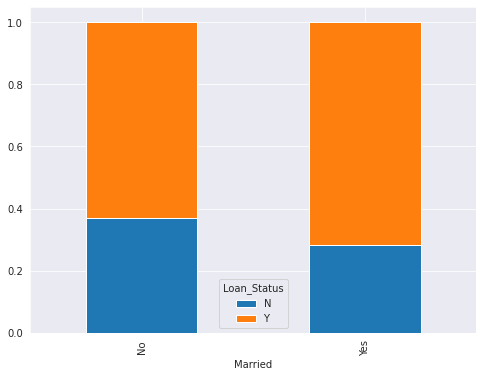

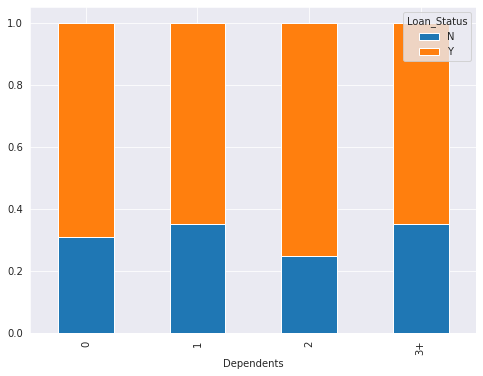

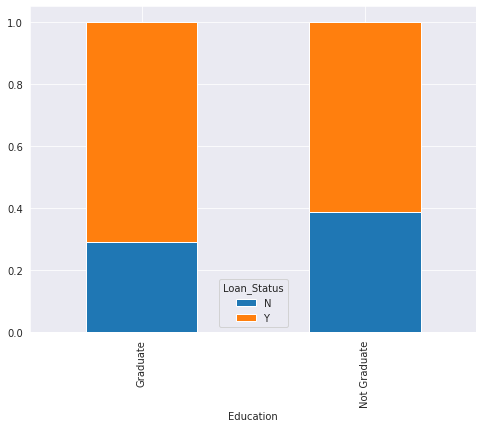

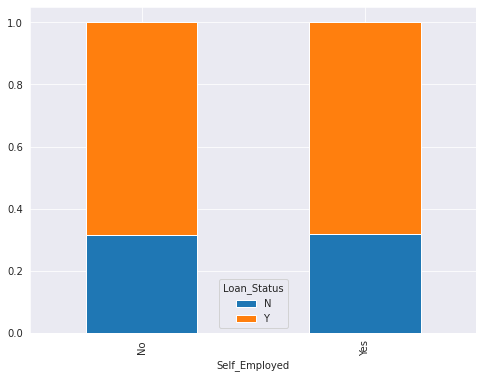

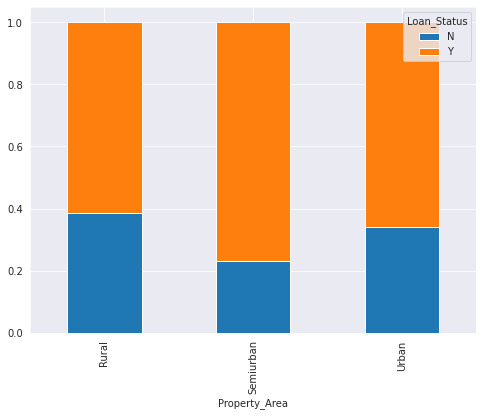

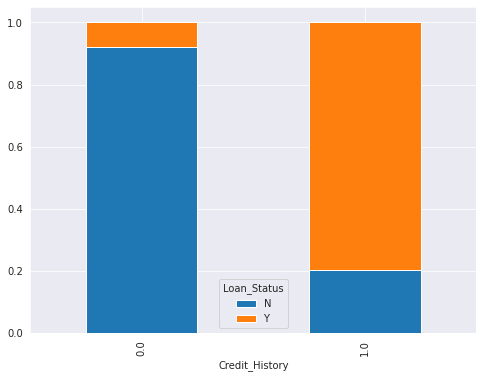

In [382]:
gender=pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
married=pd.crosstab(df['Married'],df['Loan_Status'])
married.div(married.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
dependents.div(dependents.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
education=pd.crosstab(df['Education'],df['Loan_Status'])
education.div(education.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
self_employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
self_employed.div(self_employed.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
property_area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
property_area.div(property_area.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
credit_history=pd.crosstab(df['Credit_History'],df['Loan_Status'])
credit_history.div(credit_history.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()

From the above visualization this following points can be inferred:
1. The percentage of female and male customers,getting loan approval are same.
2. Married customers are more likely to get the loan approval.
3. Customers who have 1 and 3+ dependents are having more chance to get the loan approval.
4. Graduate customers are more likely to get the loan approval.
5. The percentage of self employed and not employed customers,getting loan approval are same.
6. Customers from semi urban area are having more chance to get loan approval.
7. Customers with credit score 1 are more likely to get loan approval.

# Handling Missing Values

In [383]:
print('Missing Values: ')
df.isnull().sum()

Missing Values: 


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To handle the null values:
1. For the Categorical Features the null values will be replaced by the mode value.
2. For the Numerical features the null values will be replaced by the mean or by the median value.

In [384]:
X["Gender"].replace(np.nan,X['Gender'].mode()[0],inplace=True)
X['Married'].replace(np.nan,X['Married'].mode()[0],inplace=True)
X['Dependents'].replace(np.nan,X['Dependents'].mode()[0],inplace=True)
X['Self_Employed'].replace(np.nan,X['Self_Employed'].mode()[0],inplace=True)
X['Loan_Amount_Term'].replace(np.nan,X['Loan_Amount_Term'].mode()[0],inplace=True)
X['Credit_History'].replace(np.nan,X['Credit_History'].mode()[0],inplace=True)

As the Loan Amount feature has many outliers, we will replace the null values with median 

In [385]:
X['LoanAmount'].replace(np.nan,X['LoanAmount'].median(),inplace=True)

In [386]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**All the null values has been removed**

# Outlier Treatment

As the Loan Amount feature follows right skewed distribution, we will perform a log transformation to get the normal distribution, as the model will give a better performance on the normal distribution
The same log transformation will be applied on the test data

<AxesSubplot:xlabel='LoanAmount_Log', ylabel='Density'>

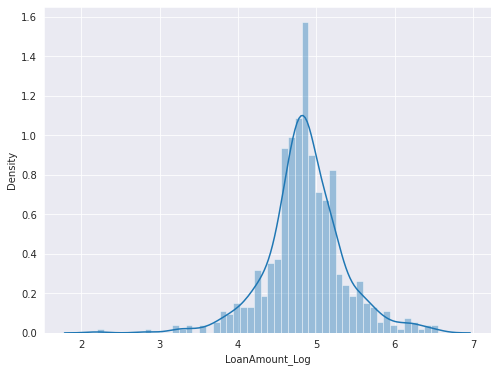

In [387]:
X['LoanAmount_Log']=np.log(X['LoanAmount'])
sns.distplot(X['LoanAmount_Log'],bins=50)

The log transformation of the Loan Amount feature follows normal distribution

In [388]:
#dropping the Loan Amount feature
X.drop('LoanAmount',axis=1,inplace=True)

# Feature Engineering

# Converting all the categorical varibales into numerical varibales

In [389]:
categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term',
 'Credit_History']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    X[i]=le.fit_transform(X[i])

In [390]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log
0,1,0,0,0,0,5849,0.0,8,1,2,4.852030
1,1,1,1,0,0,4583,1508.0,8,1,0,4.852030
2,1,1,0,0,1,3000,0.0,8,1,2,4.189655
3,1,1,0,1,0,2583,2358.0,8,1,2,4.787492
4,1,0,0,0,0,6000,0.0,8,1,2,4.948760


# Feature Selection

# Correlation Matrix

<AxesSubplot:>

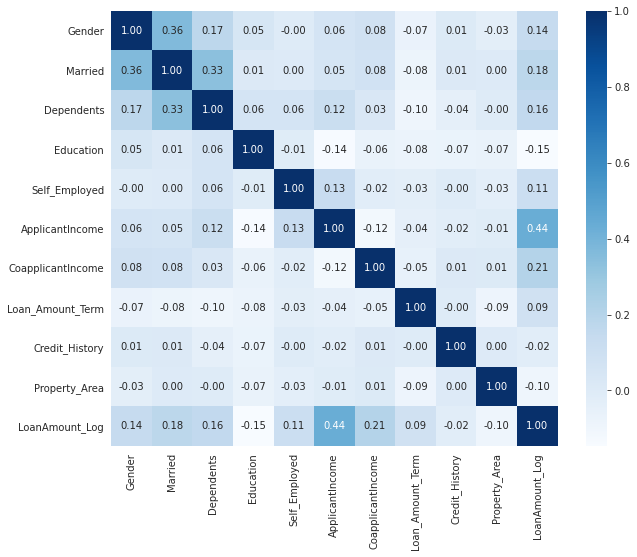

In [391]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='Blues')

# Feature Importance

In [392]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(X,y)
values=pd.Series(etc.feature_importances_)

<AxesSubplot:>

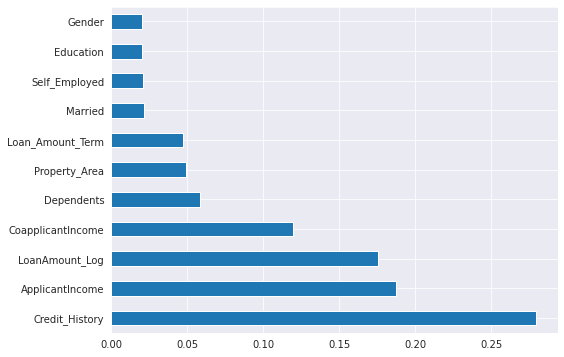

In [393]:
values.index=X.columns
values.sort_values(ascending=False).plot(kind='barh')

From the above diagram it is clear that the Credit History is the most important feature in the dataset that means customers who have paid their previous debts have higher chance to get loan approval

# Normalization of the Dataset

In [394]:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit_transform(X)
X_norm[0:5]

array([[ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.07299082, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
        -0.01053273],
       [ 0.47234264,  0.72881553,  0.25346957, -0.52836225, -0.39260074,
        -0.13441195, -0.03873155,  0.29977577,  0.41173269, -1.31851281,
        -0.01053273],
       [ 0.47234264,  0.72881553, -0.73780632, -0.52836225,  2.54711697,
        -0.39374734, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
        -1.34706757],
       [ 0.47234264,  0.72881553, -0.73780632,  1.89264089, -0.39260074,
        -0.46206247,  0.2519796 ,  0.29977577,  0.41173269,  1.22329839,
        -0.14075792],
       [ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.09772844, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
         0.18464737]])

# Model Creation

The following steps to be followed:
1. Apply all the changes in test dataset
2. separate the training dataset into train data and validation data
3. Apply different Machine Learning Classification Algorithm to train the data
4. Check the performance matrix based on the output of the Validation dataset
5. Apply the best Model into the test data

# Applying all the changes in the Test dataset

In [395]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months these four features are not having the same name in the training data. So renaming the features with the same name in the training dataset

In [396]:
df_test.rename(columns={'ApplicantIncomeMonthly':'ApplicantIncome','CoapplicantIncomeMonthly':'CoapplicantIncome','LoanAmountThousands':'LoanAmount','Loan_Amount_Term_Months':'Loan_Amount_Term'},inplace=True)

In [397]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [398]:
df_test['Gender'].replace(np.nan,df_test['Gender'].mode()[0],inplace=True)
df_test['Dependents'].replace(np.nan,df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].replace(np.nan,df_test['Self_Employed'].mode()[0],inplace=True)
df_test['LoanAmount'].replace(np.nan,df_test['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].replace(np.nan,df_test['Loan_Amount_Term'].mode()[0],inplace=True)
df_test['Credit_History'].replace(np.nan,df_test['Credit_History'].mode()[0],inplace=True)

In [399]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [400]:
for i in categorical_features:
    df_test[i]=LabelEncoder().fit_transform(df_test[i])
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,10,1,2
1,1,1,1,0,0,3076,1500,126.0,10,1,2
2,1,1,2,0,0,5000,1800,208.0,10,1,2
3,1,1,2,0,0,2340,2546,100.0,10,1,2
4,1,0,0,1,0,3276,0,78.0,10,1,2


In [401]:
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df_test.drop('LoanAmount',axis=1,inplace=True)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,0,0,5720,0,10,1,2,4.700480
1,1,1,1,0,0,3076,1500,10,1,2,4.836282
2,1,1,2,0,0,5000,1800,10,1,2,5.337538
3,1,1,2,0,0,2340,2546,10,1,2,4.605170
4,1,0,0,1,0,3276,0,10,1,2,4.356709


In [402]:
df_test_norm=StandardScaler().fit_transform(df_test)
df_test_norm[0:5]

array([[ 0.48547939,  0.75835829, -0.75822199, -0.5448117 , -0.33484506,
         0.1864605 , -0.67333511,  0.30677633,  0.4376739 ,  1.11876379,
        -0.30445573],
       [ 0.48547939,  0.75835829,  0.18187082, -0.5448117 , -0.33484506,
        -0.35269225, -0.02984821,  0.30677633,  0.4376739 ,  1.11876379,
         0.02228726],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
         0.0396413 ,  0.09884917,  0.30677633,  0.4376739 ,  1.11876379,
         1.22832616],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
        -0.50277411,  0.41887666,  0.30677633,  0.4376739 ,  1.11876379,
        -0.53377517],
       [ 0.48547939, -1.31863792, -0.75822199,  1.83549656, -0.33484506,
        -0.31190914, -0.67333511,  0.30677633,  0.4376739 ,  1.11876379,
        -1.13158141]])

# Training and Validation Data Split

In [403]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_norm,y,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((460, 11), (460,), (154, 11), (154,))

# Model Creation

The following models will the applied on the training data:
1. Logistic Regression
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Xgboost Classifier

In [404]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [405]:
accuracy=[]
f1=[]
model=[]

# Logistic Regression

In [406]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_val)

In [407]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Logistic Regression')

<AxesSubplot:>

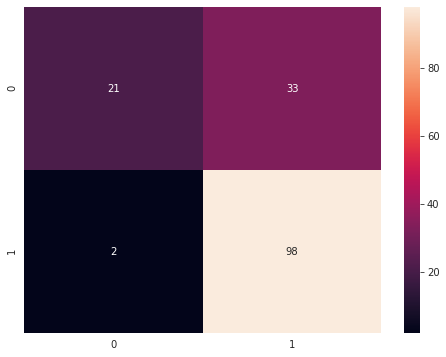

In [408]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

# Support Vector Machine

In [409]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_hat=svc.predict(x_val)

In [410]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('SVC')

<AxesSubplot:>

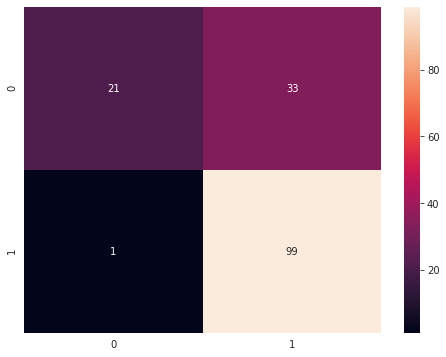

In [411]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

# Decision Tree Classifier

In [412]:
from sklearn.tree import DecisionTreeClassifier
dst=DecisionTreeClassifier(criterion='entropy')
dst.fit(x_train,y_train)
y_hat=dst.predict(x_val)

In [413]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Decision Tree')

<AxesSubplot:>

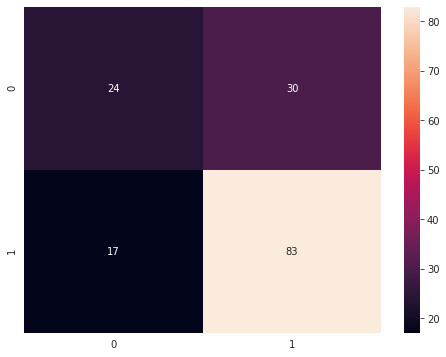

In [414]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

# Random Forest

In [415]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_hat=rfc.predict(x_val)

In [416]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Random Forest')

<AxesSubplot:>

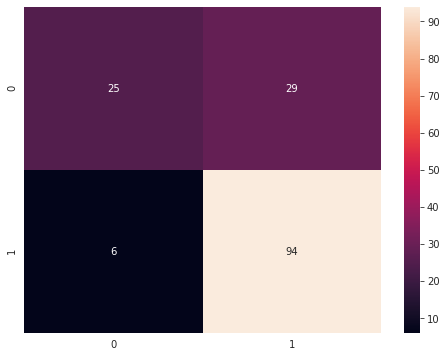

In [417]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

In [418]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,max_depth=3)
xgb.fit(x_train,y_train)
y_hat=xgb.predict(x_val)

[21:36:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [419]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Xgboost')

<AxesSubplot:>

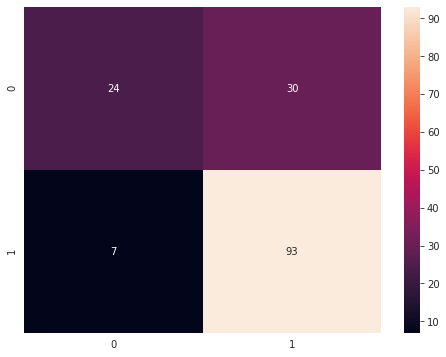

In [420]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

In [421]:
model

['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Xgboost']

In [422]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})
output

,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,SVC,0.78,0.75
2,Decision Tree,0.69,0.68
3,Random Forest,0.77,0.75
4,Xgboost,0.76,0.74


**From the above dataframe it is clear that Support Vector Classifier is giving the best accuray score and f1 score. So we will apply this model to our test data.**

In [423]:
y_pred=svc.predict(df_test_norm)
y_pred[0:5]

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [425]:
result=pd.DataFrame({'LoanID':df_test_id,
                    'Loan_Status':y_pred})
result.head()

,LoanID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
